In [1]:
#standard imports
import pandas as pd
import numpy as np
import seaborn as sns 

# to be able to count genres since movies may fall under several genres
from sklearn.feature_extraction.text import CountVectorizer

# to connect plotly with pandas
import cufflinks as cf  
import plotly           # to plot interactive visualizations
import chart_studio.plotly as py  #more charting options 
import plotly.express as px
%matplotlib inline


#to run plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot   
init_notebook_mode(connected=True)
cf.go_offline()

## TASK OUTLINE: 
1. Read in IMDB, Movielens, Rotten Tomatoes, TMDB data, and only have useful columns for EDA *done
2. Make sure each df has ratings, remove Nulls *done
3. Normalize scores *done
4. Create an aggregate score by getting the mean of the normalized scores *done
5. Read in Oscar data, add win, loss and nomination data to master DF *done
6. EDA and Plot charts based on  *done- mostly with stat stuff pending
7. Based on success criteria 1 (revenue > 2x budget) create flag of 1 or 0 in master DF - b_success (boxofficee success)
8. Based on success criteria 2 (score >= 7 ) create flag of 1 or 0 in master DF - r_success (review success)
9. Based on success criteria 3 (oscar nod) create flag of 1 or 0 in master DF - c_success (critic success)

Hypotheis test:
  - Null: Good movies do well in the box office 
  - Alternate: Good movies do not do well in the box office most of the time
  
Methodology:
  - use the kickboard example in lecture? if r_success, is it b_success? c_success? 
      - compound probability? p(rating > 7) and p(Revenue > 2x Budget)?
      - compound probability? p(oscar nod > 0) and p(Revenue > 2x Budget)?
  - Correlation tests? ROI vs score
  - eyeball charts based on data?
  






### QUESTIONS:
1. does the normalization make sense? Should I just take the mean of the 4 ratings instead?
2. presenation : slide + browser? animated gif ? streamllit? python charts or display data with 3rd party charts?
3. 2663/5000 rows that satisfy "box office success" criteria, is that enough?


In [2]:
## Read data 

def read_data(path, filename, sep='None', header=0):
    fullpath = path+filename
    #print(fullpath)
    temp_df = pd.read_csv(fullpath, sep=sep, header=header, low_memory=False)
    return temp_df

#testing = read_data('data/','title_basics.tsv', sep='\t',header=0)

### Read in IMDB Data

In [3]:
# IMDB movie and rating data
df_imdb_titles = pd.read_csv('data/title_basics.tsv', sep='\t', header=0, low_memory=False)
df_imdb_ratings = pd.read_csv('data/title_ratings.tsv', sep='\t', header=0, low_memory=False)

# combining 2 dataframes to get ratings into title data
df_imdb = pd.merge(df_imdb_titles,df_imdb_ratings,how='left',on='tconst') 


# grabbing only movies from IMDB data
df_imdb = df_imdb[df_imdb['titleType']=='movie'] 


#subset to get only relevant columns
df_imdb = df_imdb[['tconst','primaryTitle','originalTitle','startYear','runtimeMinutes','genres','averageRating','numVotes']]

In [4]:
df_imdb.isna().sum()

tconst                 0
primaryTitle           0
originalTitle          0
startYear              0
runtimeMinutes         0
genres                 0
averageRating     315727
numVotes          315727
dtype: int64

In [5]:

df_imdb = df_imdb.replace(r"\N", np.nan) 

# subset only for movies with genre 

df_imdb = df_imdb[df_imdb['genres'].notna()]
df_imdb = df_imdb[df_imdb['averageRating'].notna()]
df_imdb = df_imdb[df_imdb['startYear'].notna()]
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255072 entries, 570 to 8033868
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          255072 non-null  object 
 1   primaryTitle    255072 non-null  object 
 2   originalTitle   255072 non-null  object 
 3   startYear       255072 non-null  object 
 4   runtimeMinutes  232414 non-null  object 
 5   genres          255072 non-null  object 
 6   averageRating   255072 non-null  float64
 7   numVotes        255072 non-null  float64
dtypes: float64(2), object(6)
memory usage: 17.5+ MB


In [6]:
df_imdb.isna().sum()

tconst                0
primaryTitle          0
originalTitle         0
startYear             0
runtimeMinutes    22658
genres                0
averageRating         0
numVotes              0
dtype: int64

In [7]:
df_imdb.columns

Index(['tconst', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'genres', 'averageRating', 'numVotes'],
      dtype='object')

## Rename columns then export csv

In [8]:
#df_imdb = df_imdb[['primaryTitle','startYear','genres','averageRating','originalTitle','tconst']].sort_values(by="startYear", ascending=False)
df_imdb = df_imdb.rename(columns={'genres': 'Genres'})
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255072 entries, 570 to 8033868
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          255072 non-null  object 
 1   primaryTitle    255072 non-null  object 
 2   originalTitle   255072 non-null  object 
 3   startYear       255072 non-null  object 
 4   runtimeMinutes  232414 non-null  object 
 5   Genres          255072 non-null  object 
 6   averageRating   255072 non-null  float64
 7   numVotes        255072 non-null  float64
dtypes: float64(2), object(6)
memory usage: 17.5+ MB


In [9]:
# export data to csv
df_imdb.to_csv (r'data//IMDB_main.csv', index = False, header=True)

In [244]:
#title check
df_imdb.loc[df_imdb['primaryTitle'].str.contains("avengers", case=False)].sort_values(by='startYear',ascending=False).head(10)

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,Genres,averageRating,numVotes
5387223,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181,"Action,Adventure,Drama",8.4,890983.0
3207549,tt13925114,Avengers: Infinity War Demastered,Avengers: Infinity War Demastered,2019,135,"Action,Adventure,Comedy",8.0,15.0
7540379,tt8875872,Avengers: Reassembled,Avengers: Reassembled,2018,52,Sci-Fi,8.7,7.0
6286346,tt6172666,Avengers of Justice: Farce Wars,Avengers of Justice: Farce Wars,2018,87,"Action,Comedy,Family",2.3,428.0
5387204,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149,"Action,Adventure,Sci-Fi",8.4,888140.0
4628713,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141,"Action,Adventure,Sci-Fi",7.3,772492.0
3851346,tt1564369,Scavengers,Scavengers,2013,94,"Action,Sci-Fi,Thriller",2.9,933.0
822155,tt0848228,The Avengers,The Avengers,2012,143,"Action,Adventure,Sci-Fi",8.0,1287004.0
1011766,tt10075836,The Avengers Assemble Premiere,The Avengers Assemble Premiere,2012,NaN,Action,7.4,48.0
4138873,tt1864488,Scavengers' Union,Somateio rakosyllekton,2011,74,"Documentary,News",8.3,7.0


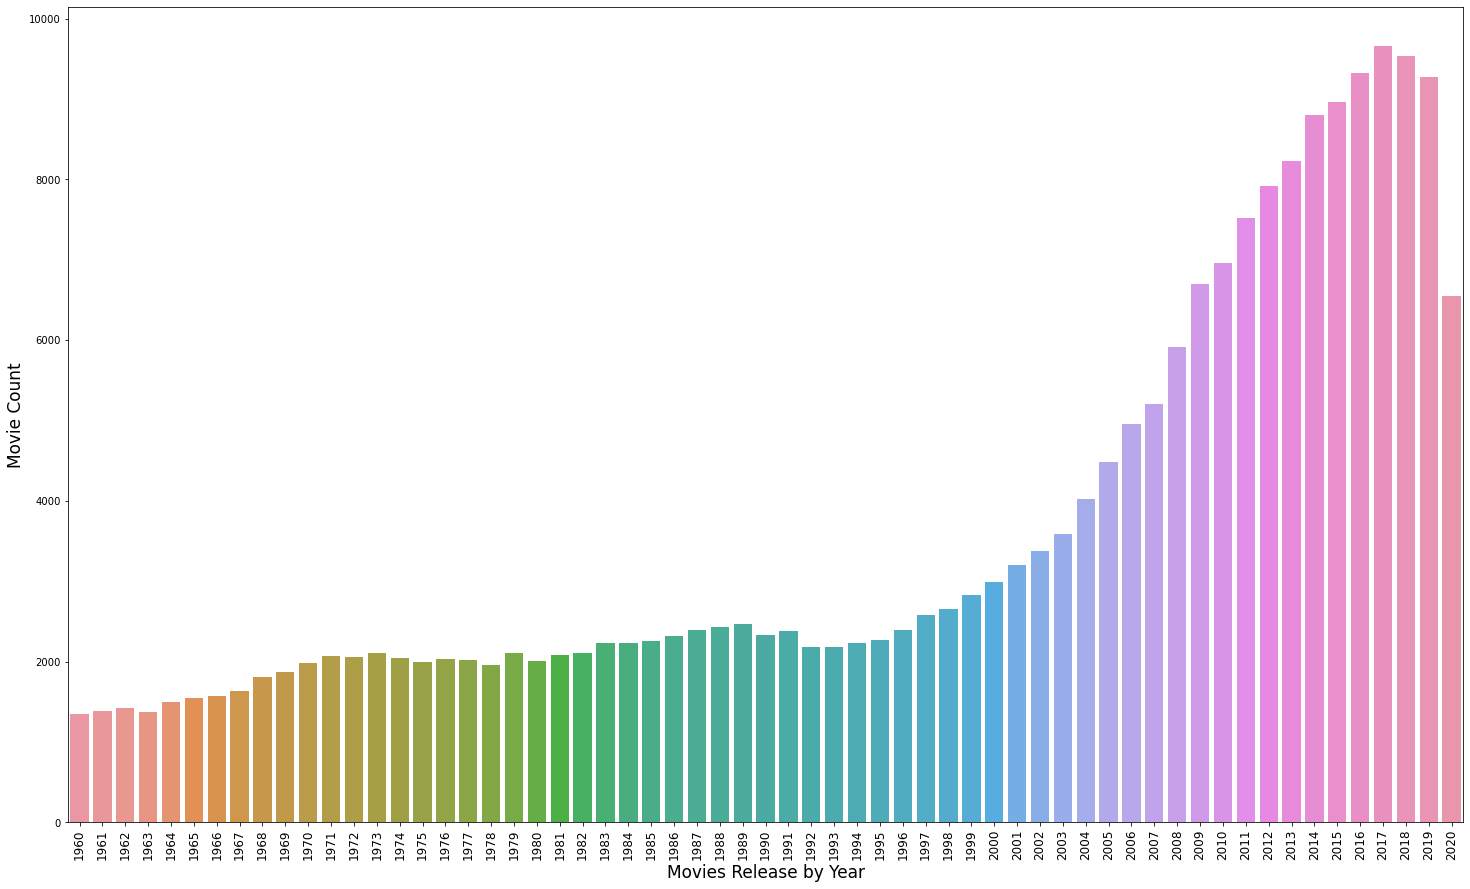

<Figure size 432x288 with 0 Axes>

In [10]:
sns.color_palette("rocket", as_cmap=True)
#bayes_df_date = bayes_df[bayes_df['Decade'].sort_values(by=['Decade'],ascending=False)]
df_imdb_range= df_imdb[(df_imdb['startYear'].astype(int)>1959) & (df_imdb['startYear'].astype(int)<2021)].sort_values(by=['startYear'])
import matplotlib.pyplot as plt
dates = df_imdb_range['startYear']

plt.figure(figsize=(25,15))
sns.countplot(x=dates)
plt.xticks(rotation= 90,fontsize = 12)
plt.xlabel("Movies Release by Year",fontsize =17)
plt.ylabel("Movie Count",fontsize = 17)
plt.show()
plt.savefig('images/moviesbyyear.png')

-----------------------------------

## Read in TMDB Data

In [152]:
df_tmdb = pd.read_csv('data/TMDB_7000_Top_Rated_Movies.csv', low_memory=False)
df_tmdb.columns

Index(['TMDb_Id', 'IMDb_Id', 'Title', 'Original_Title', 'Overview', 'Genres',
       'Cast', 'Crew', 'Collection', 'Release_Date', 'Release_Status',
       'Original_Language', 'Languages_Spoken', 'Runtime', 'Tagline',
       'Popularity', 'Rating_average', 'Rating_Count', 'Production_Companies',
       'Country_of_Origin', 'Budget', 'Revenue'],
      dtype='object')

In [276]:
df_tmdb.loc[df_tmdb['Title'].str.contains("star wars", case=False)].head(10)

,TMDb_Id,IMDb_Id,Title,Original_Title,Overview,Genres,Cast,Crew,Collection,Release_Date,...,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Year,Month
106,11,tt0076759,Star Wars,Star Wars,Princess Leia is captured and held hostage by ...,Action | Adventure | Science Fiction,Mark Hamill | Harrison Ford | Carrie Fisher | ...,George Lucas | George Lucas | George Lucas | G...,Star Wars Collection,1977-05-25,...,"A long time ago in a galaxy far, far away...",59.141,8.2,13230,Lucasfilm | 20th Century Fox,United States of America,11000000,775398007,1977,5
1046,330459,tt3748528,Rogue One: A Star Wars Story,Rogue One: A Star Wars Story,A rogue band of resistance fighters unite for ...,Action | Adventure | Science Fiction,Felicity Jones | Diego Luna | Alan Tudyk | Don...,George Lucas | Jina Jay | Kathleen Kennedy | J...,Single,2016-12-14,...,A Rebellion Built on Hope,32.115,7.5,10589,Lucasfilm | Walt Disney Pictures,United States of America,200000000,1056057273,2016,12
1250,140607,tt2488496,Star Wars: The Force Awakens,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,Action | Adventure | Fantasy | Science Fiction,Harrison Ford | Mark Hamill | Carrie Fisher | ...,George Lucas | John Williams | Kathleen Kenned...,Star Wars Collection,2015-12-15,...,Every generation has a story.,35.377,7.4,14085,Truenorth Productions | Lucasfilm | Bad Robot,United States of America,245000000,2068223624,2015,12
1461,1895,tt0121766,Star Wars: Episode III - Revenge of the Sith,Star Wars: Episode III - Revenge of the Sith,The evil Darth Sidious enacts his final plan f...,Action | Adventure | Science Fiction,Hayden Christensen | Ewan McGregor | Natalie P...,George Lucas | George Lucas | George Lucas | R...,Star Wars Collection,2005-05-17,...,The saga is complete.,27.876,7.3,8733,Lucasfilm | 20th Century Fox,United States of America,113000000,850000000,2005,5
2340,181808,tt2527336,Star Wars: The Last Jedi,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,Action | Adventure | Science Fiction,Mark Hamill | Carrie Fisher | Adam Driver | Da...,George Lucas | Carrie Fisher | John Williams |...,Star Wars Collection,2017-12-13,...,Darkness rises... and light to meet it,43.362,7.0,10176,Lucasfilm | Ram Bergman Productions | Walt Dis...,United States of America,200000000,1332539889,2017,12
3485,348350,tt3778644,Solo: A Star Wars Story,Solo: A Star Wars Story,Through a series of daring escapades deep with...,Adventure | Science Fiction,Alden Ehrenreich | Joonas Suotamo | Woody Harr...,George Lucas | Kathleen Kennedy | Jeanne McCar...,Single,2018-05-15,...,Never tell him the odds.,35.764,6.6,5046,Lucasfilm | Walt Disney Pictures | Allison She...,United States of America,250000000,392952373,2018,5
3675,181812,tt2527338,Star Wars: The Rise of Skywalker,Star Wars: The Rise of Skywalker,The surviving Resistance faces the First Order...,Action | Adventure | Science Fiction,Carrie Fisher | Mark Hamill | Daisy Ridley | A...,George Lucas | John Williams | Kathleen Kenned...,Star Wars Collection,2019-12-18,...,Every generation has a legend,134.431,6.5,3814,Lucasfilm | Bad Robot | Walt Disney Pictures,United States of America,250000000,1073604458,2019,12
3718,1894,tt0121765,Star Wars: Episode II - Attack of the Clones,Star Wars: Episode II - Attack of the Clones,Following an assassination attempt on Senator ...,Adventure | Action | Science Fiction,Hayden Christensen | Ewan McGregor | Natalie P...,George Lucas | George Lucas | George Lucas | R...,Star Wars Collection,2002-05-15,...,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,24.156,6.5,8451,Lucasfilm | 20th Century Fox,United States of America,120000000,649398328,2002,5
3867,1893,tt0120915,Star Wars: Episode I - The Phantom Menace,Star Wars: Episode I - The Phantom Menace,"Anakin Skywalker, a young slave strong with th...",Action | Adventure | Science Fiction,Liam Neeson | Ewan McGregor | Natalie Portman ...,George Lucas 

In [153]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TMDb_Id               7101 non-null   int64  
 1   IMDb_Id               7100 non-null   object 
 2   Title                 7101 non-null   object 
 3   Original_Title        7101 non-null   object 
 4   Overview              7090 non-null   object 
 5   Genres                7096 non-null   object 
 6   Cast                  7095 non-null   object 
 7   Crew                  7101 non-null   object 
 8   Collection            7101 non-null   object 
 9   Release_Date          7101 non-null   object 
 10  Release_Status        7101 non-null   object 
 11  Original_Language     7101 non-null   object 
 12  Languages_Spoken      7098 non-null   object 
 13  Runtime               7099 non-null   float64
 14  Tagline               5832 non-null   object 
 15  Popularity           

In [154]:
df_tmdb.describe()

,TMDb_Id,Runtime,Popularity,Rating_average,Rating_Count,Budget,Revenue
count,7101.000000,7099.000000,7101.000000,7101.000000,7101.000000,7.101000e+03,7.101000e+03
mean,115378.103929,105.952951,14.246566,6.542177,1439.208703,2.552330e+07,7.808008e+07
std,159675.739069,22.432662,11.537139,0.855089,2269.129166,4.003143e+07,1.677438e+08
min,5.000000,0.000000,0.600000,2.600000,200.000000,0.000000e+00,0.000000e+00
25%,9340.000000,94.000000,10.110000,6.000000,319.000000,0.000000e+00,0.000000e+00
50%,16642.000000,103.000000,12.088000,6.600000,601.000000,1.000000e+07,1.730702e+07
75%,211672.000000,117.000000,15.170000,7.200000,1433.000000,3.300000e+07,8.025391e+07
max,674944.000000,366.000000,463.487000,8.800000,25159.000000,3.800000e+08,2.797801e+09


In [277]:
# Create Month and Year Columns
df_tmdb['Year'] = pd.DatetimeIndex(df_tmdb['Release_Date']).year
df_tmdb['Month'] = pd.DatetimeIndex(df_tmdb['Release_Date']).month

In [278]:
# Subset to include only rows with Budget and Revenue > 0
df_tmdb1 = df_tmdb.copy()
df_tmdb1 = df_tmdb1[df_tmdb1['Budget']>0]
df_tmdb1 = df_tmdb1[df_tmdb1['Revenue']>0]
df_tmdb1.columns


Index(['TMDb_Id', 'IMDb_Id', 'Title', 'Original_Title', 'Overview', 'Genres',
       'Cast', 'Crew', 'Collection', 'Release_Date', 'Release_Status',
       'Original_Language', 'Languages_Spoken', 'Runtime', 'Tagline',
       'Popularity', 'Rating_average', 'Rating_Count', 'Production_Companies',
       'Country_of_Origin', 'Budget', 'Revenue', 'Year', 'Month'],
      dtype='object')

In [279]:
df_imdb.columns

Index(['tconst', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'Genres', 'averageRating', 'numVotes'],
      dtype='object')

In [280]:
#df_tmdb2.info()

## Merge IMDB with TMDB

In [265]:

# create copies of DF before merge
df_tmdb_temp = df_tmdb1.copy()
df_imdb_temp = df_imdb.copy()


In [453]:
df_IMDB_TMDB = pd.merge(df_imdb_temp, df_tmdb_temp, how='left', left_on=['tconst'], right_on=['IMDb_Id'])  

In [454]:
df_IMDB_TMDB[df_IMDB_TMDB['primaryTitle'].isna()]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,Genres_x,averageRating,numVotes,TMDb_Id,IMDb_Id,...,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Year,Month


In [455]:
df_IMDB_TMDB.columns

Index(['tconst', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'Genres_x', 'averageRating', 'numVotes', 'TMDb_Id',
       'IMDb_Id', 'Title', 'Original_Title', 'Overview', 'Genres_y', 'Cast',
       'Crew', 'Collection', 'Release_Date', 'Release_Status',
       'Original_Language', 'Languages_Spoken', 'Runtime', 'Tagline',
       'Popularity', 'Rating_average', 'Rating_Count', 'Production_Companies',
       'Country_of_Origin', 'Budget', 'Revenue', 'Year', 'Month'],
      dtype='object')

In [456]:
#title check
df_IMDB_TMDB.loc[df_IMDB_TMDB['primaryTitle'].str.contains("star wars: episode", case=False)].sort_values(by='startYear',ascending=False).head(10)

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,Genres_x,averageRating,numVotes,TMDb_Id,IMDb_Id,...,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Year,Month
192446,tt2527338,Star Wars: Episode IX - The Rise of Skywalker,Star Wars: Episode IX - The Rise of Skywalker,2019,141,"Action,Adventure,Fantasy",6.5,391907.0,181812.0,tt2527338,...,Every generation has a legend,134.431,6.5,3814.0,Lucasfilm | Bad Robot | Walt Disney Pictures,United States of America,250000000.0,1.073604e+09,2019.0,12.0
192445,tt2527336,Star Wars: Episode VIII - The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152,"Action,Adventure,Fantasy",7.0,578676.0,181808.0,tt2527336,...,Darkness rises... and light to meet it,43.362,7.0,10176.0,Lucasfilm | Ram Bergman Productions | Walt Dis...,United States of America,200000000.0,1.332540e+09,2017.0,12.0
191878,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,138,"Action,Adventure,Sci-Fi",7.8,874185.0,140607.0,tt2488496,...,Every generation has a story.,35.377,7.4,14085.0,Truenorth Productions | Lucasfilm | Bad Robot,United States of America,245000000.0,2.068224e+09,2015.0,12.0
63899,tt0121766,Star Wars: Episode III - Revenge of the Sith,Star Wars: Episode III - Revenge of the Sith,2005,140,"Action,Adventure,Fantasy",7.5,727014.0,1895.0,tt0121766,...,The saga is complete.,27.876,7.3,8733.0,Lucasfilm | 20th Century Fox,United States of America,113000000.0,8.500000e+08,2005.0,5.0
63898,tt0121765,Star Wars: Episode II - Attack of the Clones,Star Wars: Episode II - Attack of the Clones,2002,142,"Action,Adventure,Fantasy",6.5,655954.0,1894.0,tt0121765,...,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,24.156,6.5,8451.0,Lucasfilm | 20th Century Fox,United States of America,120000000.0,6.493983e+08,2002.0,5.0
63665,tt0120915,Star Wars: Episode I - The Phantom Menace,Star Wars: Episode I - The Phantom Menace,1999,136,"Action,Adventure,Fantasy",6.5,745645.0,1893.0,tt0120915,...,Every generation has a legend. Every journey h...,28.322,6.4,9341.0,Lucasfilm | 20th Century Fox,United States of America,115000000.0,9.243176e+08,1999.0,5.0
45679,tt0086190,Star Wars: Episode VI - Return of the Jedi,Star Wars: Episode VI - Return of the Jedi,1983,131,"Action,Adventure,Fantasy",8.3,970001.0,1892.0,tt0086190,...,The Empire Falls...,23.171,8.0,9300.0,Lucasfilm | 20th Century Fox,United States of America,32350000.0,5.727000e+08,1983.0,5.0
42453,tt0080684,Star Wars: Episode V - The Empire Strikes Back,Star Wars: Episode V - The Empire Strikes Back,1980,124,"Action,Adventure,Fantasy",8.7,1183795.0,1891.0,tt0080684,...,The Adventure Continues...,26.206,8.4,11171.0,Lucasfilm | 20th Century Fox,United States of America,18000000.0,5.384000e+08,1980.0,5.0
40193,tt0076759,Star Wars: Episode IV - A New Hope,Star Wars,1977,121,"Action,Adventure,Fantasy",8.6,1255848.0,11.0,tt0076759,...,"A long time ago in a galaxy far, far away...",59.141,8.2,13230.0,Lucasfilm | 20th Century Fox,United States of America,11000000.0,7.753980e+08,1977.0,5.0


In [458]:
df_IMDB_TMDB.isna().sum()

tconst                       0
primaryTitle                 0
originalTitle                0
startYear                    0
runtimeMinutes           22658
Genres_x                     0
averageRating                0
numVotes                     0
TMDb_Id                 250761
IMDb_Id                 250761
Title                   250761
Original_Title          250761
Overview                250761
Genres_y                250761
Cast                    250762
Crew                    250761
Collection              250761
Release_Date            250761
Release_Status          250761
Original_Language       250761
Languages_Spoken        250761
Runtime                 250762
Tagline                 251061
Popularity              250761
Rating_average          250761
Rating_Count            250761
Production_Companies    250765
Country_of_Origin       250762
Budget                  250761
Revenue                 250761
Year                    250761
Month                   250761
dtype: i

In [459]:
# Subset again to only include non-Na rows
df_IMDB_TMDB = df_IMDB_TMDB[df_IMDB_TMDB['Budget'].notna()]

In [460]:
df_IMDB_TMDB.loc[df_IMDB_TMDB['primaryTitle'].str.contains("star wars: episode", case=False)]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,Genres_x,averageRating,numVotes,TMDb_Id,IMDb_Id,...,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Year,Month
40193,tt0076759,Star Wars: Episode IV - A New Hope,Star Wars,1977,121,"Action,Adventure,Fantasy",8.6,1255848.0,11.0,tt0076759,...,"A long time ago in a galaxy far, far away...",59.141,8.2,13230.0,Lucasfilm | 20th Century Fox,United States of America,11000000.0,7.753980e+08,1977.0,5.0
42453,tt0080684,Star Wars: Episode V - The Empire Strikes Back,Star Wars: Episode V - The Empire Strikes Back,1980,124,"Action,Adventure,Fantasy",8.7,1183795.0,1891.0,tt0080684,...,The Adventure Continues...,26.206,8.4,11171.0,Lucasfilm | 20th Century Fox,United States of America,18000000.0,5.384000e+08,1980.0,5.0
45679,tt0086190,Star Wars: Episode VI - Return of the Jedi,Star Wars: Episode VI - Return of the Jedi,1983,131,"Action,Adventure,Fantasy",8.3,970001.0,1892.0,tt0086190,...,The Empire Falls...,23.171,8.0,9300.0,Lucasfilm | 20th Century Fox,United States of America,32350000.0,5.727000e+08,1983.0,5.0
63665,tt0120915,Star Wars: Episode I - The Phantom Menace,Star Wars: Episode I - The Phantom Menace,1999,136,"Action,Adventure,Fantasy",6.5,745645.0,1893.0,tt0120915,...,Every generation has a legend. Every journey h...,28.322,6.4,9341.0,Lucasfilm | 20th Century Fox,United States of America,115000000.0,9.243176e+08,1999.0,5.0
63898,tt0121765,Star Wars: Episode II - Attack of the Clones,Star Wars: Episode II - Attack of the Clones,2002,142,"Action,Adventure,Fantasy",6.5,655954.0,1894.0,tt0121765,...,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,24.156,6.5,8451.0,Lucasfilm | 20th Century Fox,United States of America,120000000.0,6.493983e+08,2002.0,5.0
63899,tt0121766,Star Wars: Episode III - Revenge of the Sith,Star Wars: Episode III - Revenge of the Sith,2005,140,"Action,Adventure,Fantasy",7.5,727014.0,1895.0,tt0121766,...,The saga is complete.,27.876,7.3,8733.0,Lucasfilm | 20th Century Fox,United States of America,113000000.0,8.500000e+08,2005.0,5.0
191878,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,138,"Action,Adventure,Sci-Fi",7.8,874185.0,140607.0,tt2488496,...,Every generation has a story.,35.377,7.4,14085.0,Truenorth Productions | Lucasfilm | Bad Robot,United States of America,245000000.0,2.068224e+09,2015.0,12.0
192445,tt2527336,Star Wars: Episode VIII - The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152,"Action,Adventure,Fantasy",7.0,578676.0,181808.0,tt2527336,...,Darkness rises... and light to meet it,43.362,7.0,10176.0,Lucasfilm | Ram Bergman Productions | Walt Dis...,United States of America,200000000.0,1.332540e+09,2017.0,12.0
192446,tt2527338,Star Wars: Episode IX - The Rise of Skywalker,Star Wars: Episode IX - The Rise of Skywalker,2019,141,"Action,Adventure,Fantasy",6.5,391907.0,181812.0,tt2527338,...,Every generation has a legend,134.431,6.5,3814.0,Lucasfilm | Bad Robot | Walt Disney Pictures,United States of America,250000000.0,1.073604e+09,2019.0,12.0


In [461]:
# avengers check! to see if top grossing films are still in merged database
df_IMDB_TMDB.loc[df_IMDB_TMDB['Title'].str.contains("star wars", case=False)]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,Genres_x,averageRating,numVotes,TMDb_Id,IMDb_Id,...,Tagline,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Year,Month
40193,tt0076759,Star Wars: Episode IV - A New Hope,Star Wars,1977,121,"Action,Adventure,Fantasy",8.6,1255848.0,11.0,tt0076759,...,"A long time ago in a galaxy far, far away...",59.141,8.2,13230.0,Lucasfilm | 20th Century Fox,United States of America,11000000.0,7.753980e+08,1977.0,5.0
63665,tt0120915,Star Wars: Episode I - The Phantom Menace,Star Wars: Episode I - The Phantom Menace,1999,136,"Action,Adventure,Fantasy",6.5,745645.0,1893.0,tt0120915,...,Every generation has a legend. Every journey h...,28.322,6.4,9341.0,Lucasfilm | 20th Century Fox,United States of America,115000000.0,9.243176e+08,1999.0,5.0
63898,tt0121765,Star Wars: Episode II - Attack of the Clones,Star Wars: Episode II - Attack of the Clones,2002,142,"Action,Adventure,Fantasy",6.5,655954.0,1894.0,tt0121765,...,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,24.156,6.5,8451.0,Lucasfilm | 20th Century Fox,United States of America,120000000.0,6.493983e+08,2002.0,5.0
63899,tt0121766,Star Wars: Episode III - Revenge of the Sith,Star Wars: Episode III - Revenge of the Sith,2005,140,"Action,Adventure,Fantasy",7.5,727014.0,1895.0,tt0121766,...,The saga is complete.,27.876,7.3,8733.0,Lucasfilm | 20th Century Fox,United States of America,113000000.0,8.500000e+08,2005.0,5.0
148510,tt1185834,Star Wars: The Clone Wars,Star Wars: The Clone Wars,2008,98,"Action,Adventure,Animation",5.9,60296.0,12180.0,tt1185834,...,NaN,17.588,5.9,998.0,Lucasfilm | Lucasfilm Animation | Warner Bros....,Singapore | United States of America,8500000.0,6.828284e+07,2008.0,8.0
191878,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,138,"Action,Adventure,Sci-Fi",7.8,874185.0,140607.0,tt2488496,...,Every generation has a story.,35.377,7.4,14085.0,Truenorth Productions | Lucasfilm | Bad Robot,United States of America,245000000.0,2.068224e+09,2015.0,12.0
192445,tt2527336,Star Wars: Episode VIII - The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152,"Action,Adventure,Fantasy",7.0,578676.0,181808.0,tt2527336,...,Darkness rises... and light to meet it,43.362,7.0,10176.0,Lucasfilm | Ram Bergman Productions | Walt Dis...,United States of America,200000000.0,1.332540e+09,2017.0,12.0
192446,tt2527338,Star Wars: Episode IX - The Rise of Skywalker,Star Wars: Episode IX - The Rise of Skywalker,2019,141,"Action,Adventure,Fantasy",6.5,391907.0,181812.0,tt2527338,...,Every generation has a legend,134.431,6.5,3814.0,Lucasfilm | Bad Robot | Walt Disney Pictures,United States of America,250000000.0,1.073604e+09,2019.0,12.0
208032,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133,"Action,Adventure,Sci-Fi",7.8,570235.0,330459.0,tt3748528,...,A Rebellion Built on Hope,32.115,7.5,10589.0,Lucasfilm | Walt Disney Pictures,United States of America,200000000.0,1.056057e+09,2016.0,12.0
208378,tt3778644,Solo: A Star Wars Story,Solo: A Star Wars Story,2018,135,"Action,Adventure,Sci-Fi",6.9,304167.0,348350.0,tt3778644,...,Never tell him the odds.,35.764,6.6,5046.0,Lucasfilm | Walt Disney Pictures | Allison She...,United States of America,250000000.0,3.929524e+08,2018.0,5.0


In [601]:
df_IMDB_TMDB.isna().sum()

tconst                    0
primaryTitle              0
originalTitle             0
startYear                 0
runtimeMinutes            0
Genres_x                  0
averageRating             0
numVotes                  0
TMDb_Id                   0
IMDb_Id                   0
Title                     0
Original_Title            0
Overview                  0
Genres_y                  0
Cast                      1
Crew                      0
Collection                0
Release_Date              0
Release_Status            0
Original_Language         0
Languages_Spoken          0
Runtime                   1
Tagline                 300
Popularity                0
Rating_average            0
Rating_Count              0
Production_Companies      4
Country_of_Origin         1
Budget                    0
Revenue                   0
Year                      0
Month                     0
dtype: int64

In [602]:
#df_IMDB_TMDB.info()

----------------------

### Read in Rotten Tomatoes Data and Merge with df_IMDB_TMDB

In [603]:
df_rotten = pd.read_csv('data/rotten_tomatoes_movies.csv')
df_rotten.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [604]:
# avengers check! to see if top grossing films are still in merged database
#df_rotten.loc[df_rotten['movie_title'].str.contains("avengers", case=False)]

In [605]:
# star wars check! to see if top grossing films are still in merged database
#df_rotten.loc[df_rotten['movie_title'].str.contains("star wars: episode", case=False)]

In [606]:
# subset only for movies with tomatometer_rating and original_release_date
df_rotten = df_rotten[df_rotten['tomatometer_rating'].notna()]
df_rotten['audience_rating'] = df_rotten['audience_rating'].fillna(65) # filling missing values with mean of column
#df_rotten = df_rotten[df_rotten['original_release_date'].notna()]
#df_rotten.isna().sum()
df_rotten.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           291
critics_consensus                   8534
content_rating                         0
genres                                19
directors                            193
authors                             1534
actors                               352
original_release_date               1154
streaming_release_date               352
runtime                              284
production_company                   493
tomatometer_status                     0
tomatometer_rating                     0
tomatometer_count                      0
audience_status                      413
audience_rating                        0
audience_count                       262
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [607]:
# decode original_release_date to extract year only to use as secondary key 
# for removal of duplicates or for matching later

#df_rotten['rtYear'] = pd.DatetimeIndex(df_rotten['original_release_date']).year
#df_rotten = df_rotten.astype({"rtYear": int})

df_rotten = df_rotten[['movie_title',
                       'tomatometer_rating',
                       'audience_rating',
                       'directors',
                       'content_rating',
                       ]]
df_rotten = df_rotten.rename(columns={'tomatometer_rating':'tom_critics_rating','audience_rating':'tom_rating'})



In [608]:
df_rotten.loc[df_rotten['movie_title'].str.contains("avengers", case=False)]

,movie_title,tom_critics_rating,tom_rating,directors,content_rating
1197,The Avengers,5.0,15.0,Jeremiah S. Chechik,PG-13
3030,Avengers: Age of Ultron,76.0,83.0,Joss Whedon,PG-13
3031,Avengers: Endgame,94.0,90.0,Anthony Russo,PG-13
3032,Avengers: Infinity War,85.0,91.0,Anthony Russo,PG-13
10149,Marvel's The Avengers,92.0,91.0,NaN,PG-13


In [609]:
# create copies of DF before merge
df_IMDB_TMDB_temp = df_IMDB_TMDB.copy()
df_rotten_temp = df_rotten.copy()

In [610]:
# get column indexes       
get_col_indexes(df_IMDB_TMDB_temp)

0 tconst
1 primaryTitle
2 originalTitle
3 startYear
4 runtimeMinutes
5 Genres_x
6 averageRating
7 numVotes
8 TMDb_Id
9 IMDb_Id
10 Title
11 Original_Title
12 Overview
13 Genres_y
14 Cast
15 Crew
16 Collection
17 Release_Date
18 Release_Status
19 Original_Language
20 Languages_Spoken
21 Runtime
22 Tagline
23 Popularity
24 Rating_average
25 Rating_Count
26 Production_Companies
27 Country_of_Origin
28 Budget
29 Revenue
30 Year
31 Month


In [611]:
# merge on title and movie_title
df_IMDB_TMDB_RT = pd.merge(df_IMDB_TMDB_temp, df_rotten_temp, how='left', left_on=['originalTitle'], right_on=['movie_title'])  

In [612]:
# avengers check! to see if top grossing films are still in merged database
df_IMDB_TMDB_RT.loc[df_IMDB_TMDB_RT['Title'].str.contains("avengers", case=False)][['Title','Budget','Revenue','tom_critics_rating','tom_rating','averageRating','Rating_average','startYear','Genres_x']]

,Title,Budget,Revenue,tom_critics_rating,tom_rating,averageRating,Rating_average,startYear,Genres_x
1156,The Avengers,60000000.0,4.858542e+07,5.0,15.0,3.8,4.3,1998,"Action,Adventure,Sci-Fi"
2770,The Avengers,220000000.0,1.519558e+09,5.0,15.0,8.0,7.7,2012,"Action,Adventure,Sci-Fi"
4044,Avengers: Age of Ultron,280000000.0,1.405404e+09,76.0,83.0,7.3,7.3,2015,"Action,Adventure,Sci-Fi"
4398,Avengers: Infinity War,300000000.0,2.046240e+09,85.0,91.0,8.4,8.3,2018,"Action,Adventure,Sci-Fi"
4399,Avengers: Endgame,356000000.0,2.797801e+09,94.0,90.0,8.4,8.3,2019,"Action,Adventure,Drama"


In [519]:
#df_IMDB_TMDB_RT.isna().sum()
#df_IMDB_TMDB_RT[df_IMDB_TMDB_RT[['Title','Budget','Revenue','tom_critics_rating','tom_rating','averageRating','Rating_average','startYear']].isna()]

In [613]:
## Fill in missing NaNs with researched / scrapped values (refer to website data as needed)
#df_IMDB_BOX_TMDB_RT.iat[51,30] = 8.2
#df_IMDB_BOX_TMDB_RT.iat[57,30] = 7.6


In [614]:
# subset only for movies with tomatometer_rating and original_release_date
df_IMDB_TMDB_RT = df_IMDB_TMDB_RT[df_IMDB_TMDB_RT['tom_rating'].notna()]
#df_IMDB_BOX_TMDB_RT.isna().sum()
df_IMDB_TMDB_RT.columns

Index(['tconst', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'Genres_x', 'averageRating', 'numVotes', 'TMDb_Id',
       'IMDb_Id', 'Title', 'Original_Title', 'Overview', 'Genres_y', 'Cast',
       'Crew', 'Collection', 'Release_Date', 'Release_Status',
       'Original_Language', 'Languages_Spoken', 'Runtime', 'Tagline',
       'Popularity', 'Rating_average', 'Rating_Count', 'Production_Companies',
       'Country_of_Origin', 'Budget', 'Revenue', 'Year', 'Month',
       'movie_title', 'tom_critics_rating', 'tom_rating', 'directors',
       'content_rating'],
      dtype='object')

In [615]:

df_IMDB_TMDB_RT=df_IMDB_TMDB_RT[['TMDb_Id',
                                         'IMDb_Id',
                                         'Title',
                                         'Original_Title',
                                         'Genres_x',
                                         'Cast', 'Crew',
                                         'Languages_Spoken',
                                         'Runtime',
                                         'Popularity',
                                         'Rating_Count',
                                         'Production_Companies',
                                         'Country_of_Origin',
                                         'Budget',
                                         'Revenue',
                                         'Year',
                                         'Month',
                                         'tconst',
                                         'averageRating',
                                         'Rating_average',
                                         'tom_rating',
                                         'tom_critics_rating',
                                         'directors',
                                         'content_rating'
                                        ]]

In [616]:
df_IMDB_TMDB_RT.columns

Index(['TMDb_Id', 'IMDb_Id', 'Title', 'Original_Title', 'Genres_x', 'Cast',
       'Crew', 'Languages_Spoken', 'Runtime', 'Popularity', 'Rating_Count',
       'Production_Companies', 'Country_of_Origin', 'Budget', 'Revenue',
       'Year', 'Month', 'tconst', 'averageRating', 'Rating_average',
       'tom_rating', 'tom_critics_rating', 'directors', 'content_rating'],
      dtype='object')

In [618]:
# Rename columns
df_IMDB_TMDB_RT.rename(columns={'Rating_average':'TMDB_score',
                                    'averageRating':'IMDB_score',
                                    'Genres_x':'Genres',
                                    'tom_rating':'RTomatoes_userscore',
                                    'tom_critics_rating':'RTomatoes_criticscore'
                                   }, inplace=True)

### Read in Movielens Data and merge with df_IMDB_BOX_TMDB_RT

In [619]:
df_movielens = pd.read_csv('data/Top_Rated_Movie_Database.csv')
df_movielens.columns

Index(['Popularity', 'Vote Count', 'Titile', 'Vote Average', 'Overview',
       'Release Date'],
      dtype='object')

In [620]:

df_movielens.loc[df_movielens['Titile'].str.contains("avengers", case=False)]

,Popularity,Vote Count,Titile,Vote Average,Overview,Release Date
44,83.528,17457,Avengers: Infinity War,8.3,As the Avengers and their allies have continue...,2018-04-25
80,58.091,12267,Avengers: Endgame,8.3,After the devastating events of Avengers: Infi...,2019-04-24
95,53.048,21923,The Avengers,7.7,When an unexpected enemy emerges and threatens...,2012-04-25
114,46.000,15405,Avengers: Age of Ultron,7.3,When Tony Stark tries to jumpstart a dormant p...,2015-04-22
2852,17.321,108,Avengers Confidential: Black Widow & Punisher,5.9,When the Punisher takes out a black-market wea...,2014-03-25
2890,11.557,154,Ultimate Avengers 2,6.5,Mysterious Wakanda lies in the darkest heart o...,2006-08-08
3104,12.212,181,Ultimate Avengers,6.5,When a nuclear missile was fired at Washington...,2006-02-21
4788,11.235,7,Bikini Avengers,6.3,When the Jade Empress steals the world's large...,2015-02-24
5270,10.718,399,The Avengers,4.3,"British Ministry agent John Steed, under direc...",1998-08-13
8038,8.590,62,Avengers Grimm,4.0,When Rumpelstiltskin destroys the Magic Mirror...,2015-03-17


In [621]:
# rename columns
df_movielens.rename(columns={'Vote Average':'ML_score',
                            'Popularity':'ML_Popularity',
                            'Titile':'ML_title',
                            }, inplace=True)
df_movielens.isna().sum()

ML_Popularity     0
Vote Count        0
ML_title          0
ML_score          0
Overview         25
Release Date     19
dtype: int64

In [622]:
# decode original_release_date to extract year only to use as secondary key 
# for removal of duplicates or for matching later
df_movielens['ML_year'] = pd.DatetimeIndex(df_movielens['Release Date']).year
df_movielens = df_movielens[['ML_title',
                       'ML_score',
                       'ML_year',
                       'ML_Popularity']]



In [623]:
# create copies of DF before merge
df_IMDB_TMDB_RT_temp = df_IMDB_TMDB_RT.copy()
df_movielens_temp = df_movielens.copy()

In [624]:
df_movielens.columns


Index(['ML_title', 'ML_score', 'ML_year', 'ML_Popularity'], dtype='object')

In [625]:
# merge on title and Titile
df_IMDB_TMDB_RT_ML = pd.merge(df_IMDB_TMDB_RT, df_movielens, how='left', left_on=['Title'], right_on=['ML_title'])  
#df_IMDB_BOX_TMDB_RT_ML.info()

In [626]:
df_IMDB_TMDB_RT_ML.isna().sum()

TMDb_Id                    0
IMDb_Id                    0
Title                      0
Original_Title             0
Genres                     0
Cast                       0
Crew                       0
Languages_Spoken           0
Runtime                    0
Popularity                 0
Rating_Count               0
Production_Companies       3
Country_of_Origin          0
Budget                     0
Revenue                    0
Year                       0
Month                      0
tconst                     0
IMDB_score                 0
TMDB_score                 0
RTomatoes_userscore        0
RTomatoes_criticscore      0
directors                 62
content_rating             0
ML_title                 208
ML_score                 208
ML_year                  208
ML_Popularity            208
dtype: int64

In [627]:
df_IMDB_TMDB_RT_ML.loc[df_IMDB_TMDB_RT_ML['Title'].str.contains("avengers", case=False)][['Title','Budget','Revenue','RTomatoes_userscore','RTomatoes_userscore','IMDB_score','TMDB_score','ML_title','Year']]

,Title,Budget,Revenue,RTomatoes_userscore,RTomatoes_userscore,IMDB_score,TMDB_score,ML_title,Year
1212,The Avengers,60000000.0,4.858542e+07,15.0,15.0,3.8,4.3,The Avengers,1998.0
1213,The Avengers,60000000.0,4.858542e+07,15.0,15.0,3.8,4.3,The Avengers,1998.0
2820,The Avengers,220000000.0,1.519558e+09,15.0,15.0,8.0,7.7,The Avengers,2012.0
2821,The Avengers,220000000.0,1.519558e+09,15.0,15.0,8.0,7.7,The Avengers,2012.0
4072,Avengers: Age of Ultron,280000000.0,1.405404e+09,83.0,83.0,7.3,7.3,Avengers: Age of Ultron,2015.0
4400,Avengers: Infinity War,300000000.0,2.046240e+09,91.0,91.0,8.4,8.3,Avengers: Infinity War,2018.0
4401,Avengers: Endgame,356000000.0,2.797801e+09,90.0,90.0,8.4,8.3,Avengers: Endgame,2019.0


In [628]:
# subset to remove rows with no 'Vote Average'
df_IMDB_TMDB_RT_ML = df_IMDB_TMDB_RT_ML[df_IMDB_TMDB_RT_ML['ML_title'].notna()]


#df_IMDB_BOX_TMDB_RT_ML.isna().sum()
df_IMDB_TMDB_RT_ML.columns
#df_IMDB_BOX_TMDB_RT_ML.info()

Index(['TMDb_Id', 'IMDb_Id', 'Title', 'Original_Title', 'Genres', 'Cast',
       'Crew', 'Languages_Spoken', 'Runtime', 'Popularity', 'Rating_Count',
       'Production_Companies', 'Country_of_Origin', 'Budget', 'Revenue',
       'Year', 'Month', 'tconst', 'IMDB_score', 'TMDB_score',
       'RTomatoes_userscore', 'RTomatoes_criticscore', 'directors',
       'content_rating', 'ML_title', 'ML_score', 'ML_year', 'ML_Popularity'],
      dtype='object')

In [629]:
df_IMDB_TMDB_RT_ML['Genres']

0          Drama,History,War
1          Drama,History,War
2          Drama,History,War
3          Drama,History,War
4        Comedy,Drama,Family
                ...         
4699     Drama,Horror,Sci-Fi
4700     Drama,Horror,Sci-Fi
4701    Drama,Horror,Mystery
4702      Comedy,Crime,Drama
4703    Drama,Horror,Mystery
Name: Genres, Length: 4496, dtype: object

In [630]:
# Subset to get only relevant columns
df_IMDB_TMDB_RT_ML = df_IMDB_TMDB_RT_ML[['TMDb_Id',
                                         'IMDb_Id',
                                         'Title',
                                         'IMDB_score',
                                         'RTomatoes_userscore',
                                         'RTomatoes_criticscore',
                                         'ML_score',
                                         'TMDB_score',
                                         'Original_Title',
                                         'Genres',
                                         'Cast',
                                         'Crew',
                                         'Languages_Spoken',
                                         'Runtime',
                                         'Popularity',
                                         'Rating_Count',
                                         'Production_Companies',
                                         'Country_of_Origin',
                                         'Budget',
                                         'Revenue',
                                         'Year', 'Month', 
                                         'directors',
                                         'content_rating', 
                                         'ML_Popularity']]
#df_IMDB_BOX_TMDB_RT_ML.info()

In [631]:
df_IMDB_TMDB_RT_ML.sort_values(by='Revenue',ascending=False).head(30)
#df_IMDB_TMDB_RT_ML.isna().sum()

,TMDb_Id,IMDb_Id,Title,IMDB_score,RTomatoes_userscore,RTomatoes_criticscore,ML_score,TMDB_score,Original_Title,Genres,...,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Year,Month,directors,content_rating,ML_Popularity
4401,299534.0,tt4154796,Avengers: Endgame,8.4,90.0,94.0,8.3,8.3,Avengers: Endgame,"Action,Adventure,Drama",...,12240.0,Marvel Studios,United States of America,356000000.0,2.797801e+09,2019.0,4.0,Anthony Russo,PG-13,58.091
2685,19995.0,tt0499549,Avatar,7.8,82.0,82.0,7.4,7.4,Avatar,"Action,Adventure,Fantasy",...,20789.0,Dune Entertainment | Lightstorm Entertainment ...,United States of America | United Kingdom,237000000.0,2.787965e+09,2009.0,12.0,James Cameron,PG-13,42.824
4103,140607.0,tt2488496,Star Wars: The Force Awakens,7.8,86.0,92.0,7.4,7.4,Star Wars: The Force Awakens,"Action,Adventure,Sci-Fi",...,14085.0,Truenorth Productions | Lucasfilm | Bad Robot,United States of America,245000000.0,2.068224e+09,2015.0,12.0,J.J. Abrams,PG-13,38.617
4400,299536.0,tt4154756,Avengers: Infinity War,8.4,91.0,85.0,8.3,8.3,Avengers: Infinity War,"Action,Adventure,Sci-Fi",...,17433.0,Marvel Studios,United States of America,300000000.0,2.046240e+09,2018.0,4.0,Anthony Russo,PG-13,83.528
1294,597.0,tt0120338,Titanic,7.8,69.0,89.0,7.8,7.8,Titanic,"Drama,Romance",...,16444.0,Paramount | Lightstorm Entertainment | 20th Ce...,United States of America,200000000.0,1.845034e+09,1997.0,11.0,James Cameron,PG-13,33.075
1293,597.0,tt0120338,Titanic,7.8,66.0,91.0,7.8,7.8,Titanic,"Drama,Romance",...,16444.0,Paramount | Lightstorm Entertainment | 20th Ce...,United States of America,200000000.0,1.845034e+09,1997.0,11.0,Jean Negulesco,NR,33.075
2118,135397.0,tt0369610,Jurassic World,7.0,78.0,70.0,6.6,6.6,Jurassic World,"Action,Adventure,Sci-Fi",...,15293.0,Fuji Television Network | Amblin Entertainment...,United States of America,150000000.0,1.671713e+09,2015.0,6.0,Colin Trevorrow,PG-13,24.648
4593,420818.0,tt6105098,The Lion King,6.9,93.0,93.0,7.1,7.1,The Lion King,"Adventure,Animation,Drama",...,5184.0,Walt Disney Pictures | Fairview Entertainment,United States of America,260000000.0,1.656943e+09,2019.0,7.0,"Roger Allers, Rob Minkoff",G,68.125
4594,420818.0,tt6105098,The Lion King,6.9,93.0,93.0,8.3,7.1,The Lion King,"Adventure,Animation,Drama",...,5184.0,Walt Disney Pictures | Fairview Entertainment,United States of America,260000000.0,1.656943e+09,2019.0,7.0,"Roger Allers, Rob Minkoff",G,37.112
4595,420818.0,tt6105098,The Lion King,6.9,88.0,52.0,7.1,7.1,The Lion King,"Adventure,Animation,Drama",...,5184.0,Walt Disney Pictures | Fairview Entertainment,United States of America,260000000.0,1.656943e+09,2019.0,7.0,NaN,PG,68.125


In [632]:
# use primaryTitle and startYear to remove duplicates 
df_IMDB_TMDB_RT_ML1 = df_IMDB_TMDB_RT_ML.copy()
df_IMDB_TMDB_RT_ML1 = df_IMDB_TMDB_RT_ML1.drop_duplicates(
  subset = ['TMDb_Id', 'Year'],
  keep = 'last').reset_index(drop = True)
df_IMDB_TMDB_RT_ML1.isna().sum()

TMDb_Id                   0
IMDb_Id                   0
Title                     0
IMDB_score                0
RTomatoes_userscore       0
RTomatoes_criticscore     0
ML_score                  0
TMDB_score                0
Original_Title            0
Genres                    0
Cast                      0
Crew                      0
Languages_Spoken          0
Runtime                   0
Popularity                0
Rating_Count              0
Production_Companies      3
Country_of_Origin         0
Budget                    0
Revenue                   0
Year                      0
Month                     0
directors                40
content_rating            0
ML_Popularity             0
dtype: int64

In [633]:
df_IMDB_TMDB_RT_ML1.loc[df_IMDB_TMDB_RT_ML1['Title'].str.contains("avengers", case=False)]

,TMDb_Id,IMDb_Id,Title,IMDB_score,RTomatoes_userscore,RTomatoes_criticscore,ML_score,TMDB_score,Original_Title,Genres,...,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Year,Month,directors,content_rating,ML_Popularity
815,9320.0,tt0118661,The Avengers,3.8,15.0,5.0,4.3,4.3,The Avengers,"Action,Adventure,Sci-Fi",...,399.0,Jerry Weintraub Productions | Warner Bros. Pic...,United States of America,60000000.0,4.858542e+07,1998.0,8.0,Jeremiah S. Chechik,PG-13,10.718
2036,24428.0,tt0848228,The Avengers,8.0,15.0,5.0,4.3,7.7,The Avengers,"Action,Adventure,Sci-Fi",...,21907.0,Marvel Studios | Paramount,United States of America,220000000.0,1.519558e+09,2012.0,4.0,Jeremiah S. Chechik,PG-13,10.718
2960,99861.0,tt2395427,Avengers: Age of Ultron,7.3,83.0,76.0,7.3,7.3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",...,15394.0,Marvel Studios,United States of America,280000000.0,1.405404e+09,2015.0,4.0,Joss Whedon,PG-13,46.000
3213,299536.0,tt4154756,Avengers: Infinity War,8.4,91.0,85.0,8.3,8.3,Avengers: Infinity War,"Action,Adventure,Sci-Fi",...,17433.0,Marvel Studios,United States of America,300000000.0,2.046240e+09,2018.0,4.0,Anthony Russo,PG-13,83.528
3214,299534.0,tt4154796,Avengers: Endgame,8.4,90.0,94.0,8.3,8.3,Avengers: Endgame,"Action,Adventure,Drama",...,12240.0,Marvel Studios,United States of America,356000000.0,2.797801e+09,2019.0,4.0,Anthony Russo,PG-13,58.091


In [634]:
# export data to csv
df_IMDB_TMDB_RT_ML1.to_csv (r'data/all_movie_data_unscaled.csv', index = False, header=True)

In [653]:
plot_df = df_IMDB_TMDB_RT_ML1.copy()

In [654]:
plot_df.sort_values(by='Revenue',ascending=False)

,TMDb_Id,IMDb_Id,Title,IMDB_score,RTomatoes_userscore,RTomatoes_criticscore,ML_score,TMDB_score,Original_Title,Genres,...,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Year,Month,directors,content_rating,ML_Popularity
3214,299534.0,tt4154796,Avengers: Endgame,8.4,90.0,94.0,8.3,8.3,Avengers: Endgame,"Action,Adventure,Drama",...,12240.0,Marvel Studios,United States of America,356000000.0,2.797801e+09,2019.0,4.0,Anthony Russo,PG-13,58.091
1940,19995.0,tt0499549,Avatar,7.8,82.0,82.0,7.4,7.4,Avatar,"Action,Adventure,Fantasy",...,20789.0,Dune Entertainment | Lightstorm Entertainment ...,United States of America | United Kingdom,237000000.0,2.787965e+09,2009.0,12.0,James Cameron,PG-13,42.824
2985,140607.0,tt2488496,Star Wars: The Force Awakens,7.8,86.0,92.0,7.4,7.4,Star Wars: The Force Awakens,"Action,Adventure,Sci-Fi",...,14085.0,Truenorth Productions | Lucasfilm | Bad Robot,United States of America,245000000.0,2.068224e+09,2015.0,12.0,J.J. Abrams,PG-13,38.617
3213,299536.0,tt4154756,Avengers: Infinity War,8.4,91.0,85.0,8.3,8.3,Avengers: Infinity War,"Action,Adventure,Sci-Fi",...,17433.0,Marvel Studios,United States of America,300000000.0,2.046240e+09,2018.0,4.0,Anthony Russo,PG-13,83.528
875,597.0,tt0120338,Titanic,7.8,69.0,89.0,7.8,7.8,Titanic,"Drama,Romance",...,16444.0,Paramount | Lightstorm Entertainment | 20th Ce...,United States of America,200000000.0,1.845034e+09,1997.0,11.0,James Cameron,PG-13,33.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,9423.0,tt0120458,Virus,5.0,21.0,12.0,6.0,5.1,Virus,"Action,Horror,Sci-Fi",...,299.0,Universal Pictures | Mutual Film Company | Dar...,United States of America | United Kingdom | Ge...,75.0,3.000000e+01,1999.0,1.0,John Bruno,R,8.358
737,11980.0,tt0114194,The Prophecy,6.5,64.0,43.0,6.5,6.5,The Prophecy,"Action,Crime,Drama",...,245.0,Overseas FilmGroup | Dimension Films | First L...,United States of America,8.0,1.600000e+01,1995.0,9.0,Gregory Widen,R,10.506
1473,14844.0,tt0360139,Chasing Liberty,6.1,60.0,18.0,6.2,6.2,Chasing Liberty,"Comedy,Romance",...,357.0,Micro Fusion 2003-2 | Alcon Entertainment | Tr...,United Kingdom | United States of America,23000000.0,1.200000e+01,2004.0,1.0,"Andy Cadiff, Shelly Ziegler",PG-13,9.220
1977,2196.0,tt0795368,Death at a Funeral,7.4,45.0,43.0,6.9,6.9,Death at a Funeral,Comedy,...,1011.0,Target Media Entertainment | VIP 2 Medienfonds...,United Kingdom,9.0,8.000000e+00,2007.0,8.0,"Neil LaBute, Rogier Stoffers",R,11.552


### Create a 'COMBO' score from ratings

In [655]:
#rescale rotten tomato scores
plot_df['RTomatoes_userscore'] = plot_df['RTomatoes_userscore']/10
plot_df['RTomatoes_criticscore'] = plot_df['RTomatoes_criticscore']/10
# create copy for computations
df_movies_temp = plot_df.copy()

#specify columns to create combo score which averages the ratings of the  sites

# These are from IMDB, Rotten Tomatoes (audience), MovieLens User scores
usercols = ['IMDB_score','RTomatoes_userscore','RTomatoes_userscore','ML_score']

# These are from Rotten Tomatoes and TMDB Critics Scores
criticcols = ['RTomatoes_criticscore','TMDB_score'] 

#create the new column 
df_movies_temp['User_Score'] = df_movies_temp[usercols].astype(float).mean(axis=1)
df_movies_temp['Critics_Score'] = df_movies_temp[criticcols].astype(float).mean(axis=1)

In [656]:
df_movies_temp['ROI'] = (df_movies_temp['Revenue'].astype(float) / df_movies_temp['Budget'].astype(float)) * 100
plotting_df = df_movies_temp[['Title','User_Score','Critics_Score','Budget','Revenue','ROI','Year','Genres','Runtime']]

### Scale money columns to diplays Millions.

In [657]:
plotting_df.sort_values(by='Revenue',ascending=False).head(10)

,Title,User_Score,Critics_Score,Budget,Revenue,ROI,Year,Genres,Runtime
3214,Avengers: Endgame,8.675,8.85,356000000.0,2.797801e+09,785.899035,2019.0,"Action,Adventure,Drama",181.0
1940,Avatar,7.900,7.80,237000000.0,2.787965e+09,1176.356577,2009.0,"Action,Adventure,Fantasy",162.0
2985,Star Wars: The Force Awakens,8.100,8.30,245000000.0,2.068224e+09,844.172908,2015.0,"Action,Adventure,Sci-Fi",136.0
3213,Avengers: Infinity War,8.725,8.40,300000000.0,2.046240e+09,682.079879,2018.0,"Action,Adventure,Sci-Fi",149.0
875,Titanic,7.350,8.35,200000000.0,1.845034e+09,922.517094,1997.0,"Drama,Romance",194.0
1517,Jurassic World,7.300,6.80,150000000.0,1.671713e+09,1114.475472,2015.0,"Action,Adventure,Sci-Fi",124.0
3355,The Lion King,8.200,6.15,260000000.0,1.656943e+09,637.285921,2019.0,"Adventure,Animation,Drama",118.0
2036,The Avengers,3.825,4.10,220000000.0,1.519558e+09,690.708141,2012.0,"Action,Adventure,Sci-Fi",143.0
2960,Avengers: Age of Ultron,7.800,7.45,280000000.0,1.405404e+09,501.929891,2015.0,"Action,Adventure,Sci-Fi",141.0
2748,Black Panther,7.625,8.50,200000000.0,1.346739e+09,673.369553,2018.0,"Action,Adventure,Sci-Fi",134.0


In [659]:
# dividing budget and revenue to scale by millions for plotting
plotting_df['Budget'] = plotting_df['Budget']//1000000
plotting_df['Revenue'] = plotting_df['Revenue']//1000000
plotting_df['ROI'] = plotting_df['Revenue'].astype(int)

### rounding off numbers with (int)

In [660]:
# rounding to 1 decimal
plotting_df['User_Score']=plotting_df['User_Score'].round(decimals=1)
plotting_df['Critics_Score']=plotting_df['Critics_Score'].round(decimals=1)
plotting_df['Budget'] = plotting_df['Budget'].astype(int)
plotting_df['Revenue'] = plotting_df['Revenue'].astype(int)
plotting_df['Year'] = plotting_df['Year'].astype(int)
plotting_df['Runtime'] = plotting_df['Runtime'].astype(int)

plotting_df.sort_values(by='Revenue',ascending=False).head(10)

,Title,User_Score,Critics_Score,Budget,Revenue,ROI,Year,Genres,Runtime
3214,Avengers: Endgame,8.7,8.9,356,2797,2797,2019,"Action,Adventure,Drama",181
1940,Avatar,7.9,7.8,237,2787,2787,2009,"Action,Adventure,Fantasy",162
2985,Star Wars: The Force Awakens,8.1,8.3,245,2068,2068,2015,"Action,Adventure,Sci-Fi",136
3213,Avengers: Infinity War,8.7,8.4,300,2046,2046,2018,"Action,Adventure,Sci-Fi",149
875,Titanic,7.4,8.4,200,1845,1845,1997,"Drama,Romance",194
1517,Jurassic World,7.3,6.8,150,1671,1671,2015,"Action,Adventure,Sci-Fi",124
3355,The Lion King,8.2,6.2,260,1656,1656,2019,"Adventure,Animation,Drama",118
2036,The Avengers,3.8,4.1,220,1519,1519,2012,"Action,Adventure,Sci-Fi",143
2960,Avengers: Age of Ultron,7.8,7.4,280,1405,1405,2015,"Action,Adventure,Sci-Fi",141
2748,Black Panther,7.6,8.5,200,1346,1346,2018,"Action,Adventure,Sci-Fi",134


### adding a Profit column for plotting

In [661]:
plotting_df['Profit'] = plotting_df['Revenue'] - plotting_df['Budget'] 

### adding decade field for plotting

In [662]:
# create decade field
#tempdf = plotting_df.copy()

d60 = np.arange(1960,1970,1)
d70 = np.arange(1970,1980,1)
d80 = np.arange(1980,1990,1)
d90 = np.arange(1990,2000,1)
d00 = np.arange(2000,2010,1)
d10 = np.arange(2010,2020,1)
conditions = [
     plotting_df['Year'].isin(d60),
     plotting_df['Year'].isin(d70),
     plotting_df['Year'].isin(d80),
     plotting_df['Year'].isin(d90),
     plotting_df['Year'].isin(d00),
     plotting_df['Year'].isin(d10)]
      
choices = [1960,1970,1980,1990,2000,2010]
plotting_df['Decade'] = np.select(conditions, choices, default=2020)
plotting_df.head(100)

,Title,User_Score,Critics_Score,Budget,Revenue,ROI,Year,Genres,Runtime,Profit,Decade
0,The Birth of a Nation,6.7,6.8,0,11,11,1915,"Drama,History,War",193,11,2020
1,The Kid,5.8,6.4,0,2,2,1921,"Comedy,Drama,Family",68,2,2020
2,The Gold Rush,8.7,9.0,0,2,2,1925,"Adventure,Comedy,Drama",95,2,2020
3,Metropolis,8.4,9.0,1,0,0,1927,"Drama,Sci-Fi",153,-1,2020
4,All Quiet on the Western Front,7.1,8.9,1,3,3,1930,"Drama,War",133,2,2020
...,...,...,...,...,...,...,...,...,...,...,...
95,Mary Poppins,8.2,8.8,6,102,102,1964,"Comedy,Family,Fantasy",139,96,1960
96,Zulu,8.2,8.6,3,8,8,1964,"Drama,History,War",138,5,1960
97,Doctor Zhivago,8.3,8.0,11,111,111,1965,"Drama,Romance,War",200,100,1960
98,The Sound of Music,8.5,8.0,8,286,286,1965,"Biography,Drama,Family",175,278,1960


## limiting range from 1960 - 2020

In [663]:
plotting_df= plotting_df[plotting_df['Year']>1959]
plotting_df= plotting_df[plotting_df['Year']<2021]

In [667]:
## Exporting Aggregate Movie data
# export data to csv
plotting_df.to_csv (r'data/all_movie_data_cleaned.csv', index = False, header=True)
%store plotting_df

Stored 'plotting_df' (DataFrame)


In [668]:
plotting_df

,Title,User_Score,Critics_Score,Budget,Revenue,ROI,Year,Genres,Runtime,Profit,Decade
25,Kate & Leopold,6.2,5.6,48,76,76,2001,"Comedy,Fantasy,Romance",118,28,2000
71,The Apartment,8.8,8.8,3,25,25,1960,"Comedy,Drama,Romance",125,22,1960
72,The Magnificent Seven,7.4,7.0,2,4,4,1960,"Action,Adventure,Western",128,2,1960
73,Peeping Tom,8.1,8.6,0,0,0,1960,"Drama,Horror,Thriller",101,0,1960
74,Psycho,8.2,9.0,0,32,32,1960,"Horror,Mystery,Thriller",109,32,1960
...,...,...,...,...,...,...,...,...,...,...,...
3432,1917,8.5,8.4,100,368,368,2019,"Drama,Thriller,War",119,268,2010
3433,Child's Play,5.9,6.1,10,44,44,2019,"Drama,Horror,Sci-Fi",90,34,2010
3434,Midsommar,6.7,7.7,9,42,42,2019,"Drama,Horror,Mystery",148,33,2010
3435,Knives Out,8.5,8.8,40,308,308,2019,"Comedy,Crime,Drama",131,268,2010


## Read in Oscar Data

In [669]:

# load csv and remove rows with NaN film values
df_oscar = pd.read_csv('data/the_oscar_award.csv')
df_oscar = df_oscar[df_oscar['film'].notna()]

#subset to range 1960-2020
df_oscar = df_oscar[(df_oscar['year_film']>1959) & (df_oscar['year_film']<2021)]
#df[(df.a != -1) & (df.b != -1)]

#oscar winners
df_oscar_w = df_oscar[df_oscar['winner']==True] 

# oscar nominees 
df_oscar_f = df_oscar[df_oscar['winner']==False] 

In [670]:
df_oscar_w.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner'],
      dtype='object')

In [674]:
# get award win counts per movie 
df_oscar_w['Wins'] = df_oscar_w.groupby(['film'])['winner'].transform('count')
# get award nomination but not win counts per movie 
df_oscar_f['Nominations'] = df_oscar_f.groupby(['film'])['winner'].transform('count')

In [675]:
# use film and year_film to remove duplicates 
df_oscar_w1 = df_oscar_w.copy()
df_oscar_w1 = df_oscar_w1.drop_duplicates(
  subset = ['film', 'year_film'],
  keep = 'last').reset_index(drop = True)
df_oscar_w1=df_oscar_w1[['year_film','film','Wins']]

In [676]:
# use film and year_film to remove duplicates 
df_oscar_f1 = df_oscar_f.copy()
df_oscar_f1 = df_oscar_f1.drop_duplicates(
  subset = ['film', 'year_film'],
  keep = 'last').reset_index(drop = True)
df_oscar_f1=df_oscar_f1[['year_film','film','Nominations']]

In [677]:
# making copies before attempting merge
from copy import copy
df_oscar_w_temp = df_oscar_w1.copy()
df_oscar_f_temp = df_oscar_f1.copy()
df_all_temp = plotting_df.copy()

In [678]:
df_all2 = pd.merge(df_all_temp,df_oscar_w_temp,how='left',left_on=["Title", "Year"], right_on=["film", "year_film"]) 

In [679]:
df_all3 = pd.merge(df_all2,df_oscar_f_temp,how='left',left_on=["Title", "Year"], right_on=["film", "year_film"]) 


In [680]:
# use primaryTitle and startYear to remove duplicates 
df_all4 = df_all3.copy()
df_all4 = df_all4.drop_duplicates(
  subset = ['Title', 'Year'],
  keep = 'last').reset_index(drop = True)
df_all4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3367 entries, 0 to 3366
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          3367 non-null   object 
 1   User_Score     3367 non-null   float64
 2   Critics_Score  3367 non-null   float64
 3   Budget         3367 non-null   int64  
 4   Revenue        3367 non-null   int64  
 5   ROI            3367 non-null   int64  
 6   Year           3367 non-null   int64  
 7   Genres         3367 non-null   object 
 8   Runtime        3367 non-null   int64  
 9   Profit         3367 non-null   int64  
 10  Decade         3367 non-null   int64  
 11  year_film_x    326 non-null    float64
 12  film_x         326 non-null    object 
 13  Wins           326 non-null    float64
 14  year_film_y    749 non-null    float64
 15  film_y         749 non-null    object 
 16  Nominations    749 non-null    float64
dtypes: float64(6), int64(7), object(4)
memory usage: 447

In [682]:
df_all4.columns

Index(['Title', 'User_Score', 'Critics_Score', 'Budget', 'Revenue', 'ROI',
       'Year', 'Genres', 'Runtime', 'Profit', 'Decade', 'year_film_x',
       'film_x', 'Wins', 'year_film_y', 'film_y', 'Nominations'],
      dtype='object')

In [683]:
df_alldata = df_all4[['Title',
                      'Critics_Score',
                      'User_Score',
                      'Budget',
                      'Revenue',
                      'Profit',
                      'ROI',
                      'Year',
                      'Runtime',
                      'Genres',
                      'Wins',
                      'Nominations',
                      'Decade']]

In [684]:
df_alldata['Wins'] = df_alldata['Wins'].fillna(0).astype(int)
df_alldata['Nominations'] = df_alldata['Nominations'].fillna(0).astype(int)
df_alldata['Runtime'] = df_alldata['Runtime'].fillna(0).astype(int)


In [685]:
df_alldata.sort_values(by='Revenue', ascending=False)
%store df_alldata

Stored 'df_alldata' (DataFrame)


-------------

### Prep Genres for plotting

In [686]:
def get_genres(temp_df):

    vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp_df)
    genre_pile = vec.transform(temp_df)
    unique_genres =  vec.get_feature_names()
    # this is the master list of genres from IMDB
    imdb_genres = np.array(unique_genres)
    return imdb_genres


In [687]:
gen_temp = df_alldata['Genres']
glist = list(get_genres(gen_temp))
glist = [gen.title() for gen in glist]

In [688]:
gen_temp = df_alldata['Genres']

In [689]:
# Limit range to 1960 - 2020
df_genres = df_alldata[(df_alldata['Year']>1959) & (df_alldata['Year']<2021)]

In [690]:
years_by_genre =pd.DataFrame(index=glist,columns=range(1960,2021))
#Generate a dataframe with genre as row, year as column then fill with 0s to initialize
years_by_genre.fillna(value=0,inplace=True)
genre_yr = np.array(df_genres['Year'])#Used to traverse all years
q = 0
for i in df_genres['Genres']:
    split_gen = i.split(',')
    #print(split_gen)
    for j in split_gen:
        #Get a count of movies / year of this specific genre
        years_by_genre.loc[j,genre_yr[q]] = years_by_genre.loc[j,genre_yr[q]]+1 
    q+=1      
type(years_by_genre)

pandas.core.frame.DataFrame

In [691]:
years_by_genre.T

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
1960,1,2,0,1,1,0,3,0,0,0,2,0,0,1,1,0,0,2,0,1
1961,0,0,0,0,1,1,3,0,0,0,0,0,1,0,1,0,1,0,0,0
1962,2,2,0,1,0,1,6,0,0,1,0,0,0,0,1,0,0,3,0,2
1963,0,2,1,1,2,0,3,0,0,2,1,0,0,2,1,0,0,0,0,0
1964,1,1,0,0,2,1,2,1,1,1,0,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,57,42,12,22,54,24,80,9,12,10,19,3,0,11,18,13,3,21,0,1
2017,41,32,11,14,40,30,70,1,16,5,19,3,2,14,13,9,0,21,1,1
2018,46,42,12,15,39,22,53,6,8,4,18,3,1,15,11,16,2,22,0,0
2019,29,28,9,7,28,11,30,8,11,1,17,2,0,11,8,8,0,14,1,0


In [692]:
years_by_genre.T.to_csv(r'data/genre_year.csv', index = False, header=True)
%store years_by_genre
%store plot_df

Stored 'years_by_genre' (DataFrame)
Stored 'plot_df' (DataFrame)


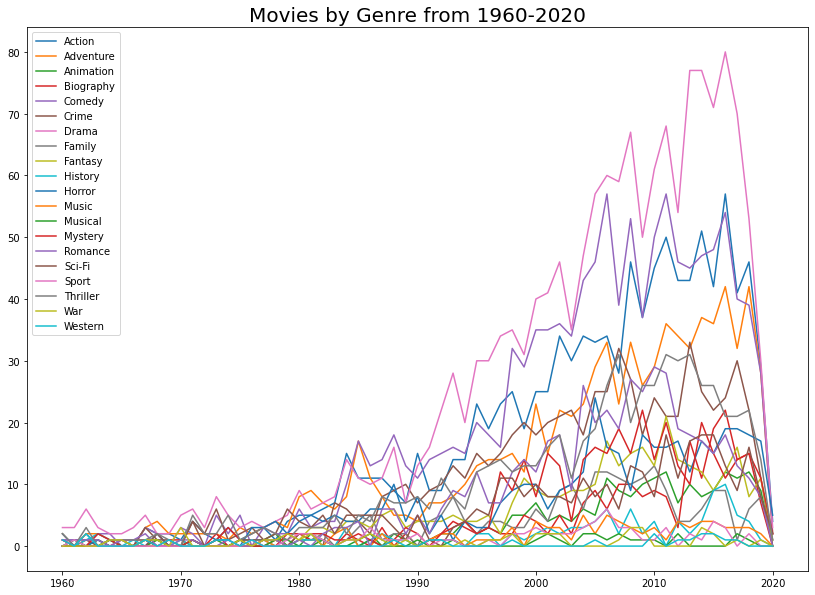

In [693]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(14,10))
plt.plot(years_by_genre.T)
plt.title('Movies by Genre from 1960-2020',fontsize=20)
plt.xticks(range(1960,2030,10))
plt.legend(years_by_genre.T)
plt.show()

-----------------------------------
### Read in top 1000 budget data 

In [695]:
df_budget1 = pd.read_csv('data/regex_imdb.csv')
top50lst = df_budget1.sort_values(by='Gross', ascending=False).head(50)['Name']
top50lst = list(top50lst)
#top50lst

In [699]:
## top 50 list check
df_alldata[df_alldata['Title'].isin(top50lst)].sort_values(by='Revenue', ascending=False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 3144 to 745
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          42 non-null     object 
 1   Critics_Score  42 non-null     float64
 2   User_Score     42 non-null     float64
 3   Budget         42 non-null     int64  
 4   Revenue        42 non-null     int64  
 5   Profit         42 non-null     int64  
 6   ROI            42 non-null     int64  
 7   Year           42 non-null     int64  
 8   Runtime        42 non-null     int64  
 9   Genres         42 non-null     object 
 10  Wins           42 non-null     int64  
 11  Nominations    42 non-null     int64  
 12  Decade         42 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 4.6+ KB


In [ ]:
#df_budget1.sort_values(by='Rating',ascending=False)

## Create flags for plotting based on Good/Bad and Successful/Not Successful ROI  

In [704]:
bayes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3367 entries, 0 to 3366
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          3367 non-null   object 
 1   Critics_Score  3367 non-null   float64
 2   User_Score     3367 non-null   float64
 3   Budget         3367 non-null   int64  
 4   Revenue        3367 non-null   int64  
 5   Profit         3367 non-null   int64  
 6   ROI            3367 non-null   int64  
 7   Year           3367 non-null   int64  
 8   Runtime        3367 non-null   int64  
 9   Genres         3367 non-null   object 
 10  Wins           3367 non-null   int64  
 11  Nominations    3367 non-null   int64  
 12  Decade         3367 non-null   int64  
 13  Success        3367 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 368.4+ KB


## Add a flag in the DF for movie financial success.
#### Value is 1 if Revenue is 3X budget, 0 if not

In [714]:
bayes_df = df_alldata.copy()

In [715]:
# Create Success Column
s_conditions = [
    bayes_df['Revenue']>3*bayes_df['Budget'] & (bayes_df['Profit']>0),
    bayes_df['Revenue']<3*bayes_df['Budget'] | (bayes_df['Profit']<0)
    ]
s_results = [1,0]
bayes_df['Profitable'] = np.select(s_conditions,s_results) 

## Add columns: 'Critics_Choice' based on critics score and 'User_Pick' baed on users scores in the DF.
#### Value is 1 if aggregated score is >= 7, 0 if not

In [721]:
# Create Good Movie Column (critics scores)
s_conditions1 = [
    bayes_df['Critics_Score']>=7.5,
    bayes_df['Critics_Score']<7.5,
    ]
s_results1 = [1,0]
bayes_df['Critics_Choice'] = np.select(s_conditions1,s_results1,default=0) 

In [722]:
# Create Good Movie Column (user scores)
s_conditions2 = [
    bayes_df['User_Score']>=7.5,
    bayes_df['User_Score']<7.5
    ]
s_results2 = [1,0]
bayes_df['Users_Pick'] = np.select(s_conditions2,s_results2,default=0) 

## Add columns: Award
#### Value is 1 if movie has an oscar nomination or award

In [723]:
# Create Good Movie Column (Awards only)
s_conditions3 = [
    (bayes_df['Wins']>0),
    (bayes_df['Nominations']>0)
    ]
s_results3 = [1,1]
bayes_df['Award_Status'] = np.select(s_conditions3,s_results3,default=0) 

In [724]:
bayes_df=bayes_df[['Title',
                   'Critics_Score', 
                   'User_Score', 
                   'Budget', 
                   'Revenue', 
                   'Profit',
                   'ROI',
                   'Profitable',
                   'Critics_Choice',
                   'Users_Pick',
                   'Award_Status',
                   'Wins', 
                   'Nominations',
                   'Genres',
                   'Year','Decade',
                   'Runtime']]
bayes_df

,Title,Critics_Score,User_Score,Budget,Revenue,Profit,ROI,Profitable,Critics_Choice,Users_Pick,Award_Status,Wins,Nominations,Genres,Year,Decade,Runtime
0,Kate & Leopold,5.6,6.2,48,76,28,76,1,0,0,1,0,1,"Comedy,Fantasy,Romance",2001,2000,118
1,The Apartment,8.8,8.8,3,25,22,25,1,1,1,1,5,5,"Comedy,Drama,Romance",1960,1960,125
2,The Magnificent Seven,7.0,7.4,2,4,2,4,1,0,0,1,0,1,"Action,Adventure,Western",1960,1960,128
3,Peeping Tom,8.6,8.1,0,0,0,0,0,1,1,0,0,0,"Drama,Horror,Thriller",1960,1960,101
4,Psycho,9.0,8.2,0,32,32,32,1,1,1,1,0,4,"Horror,Mystery,Thriller",1960,1960,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,1917,8.4,8.5,100,368,268,368,1,1,1,1,3,7,"Drama,Thriller,War",2019,2010,119
3363,Child's Play,6.1,5.9,10,44,34,44,1,0,0,0,0,0,"Drama,Horror,Sci-Fi",2019,2010,90
3364,Midsommar,7.7,6.7,9,42,33,42,1,1,0,0,0,0,"Drama,Horror,Mystery",2019,2010,148
3365,Knives Out,8.8,8.5,40,308,268,308,1,1,1,1,0,1,"Comedy,Crime,Drama",2019,2010,131


In [725]:
bayes_df.to_csv(r'data/movie_aggregate.csv', index = False, header=True)

In [726]:
%store bayes_df

Stored 'bayes_df' (DataFrame)


## Data with Flags for Statistical Analysis

In [ ]:
bayes_df.describe()

In [ ]:
bayes_df.head()

In [ ]:
#bayes_df[bayes_df['Score']<7.5].sort_values(by='Score',ascending=False)

## Normalization of review scores

In [ ]:
dfnorm = pd.read_csv('data/to_normalize.csv')
#dfnorm.columns
dfnorm1 = dfnorm[['audience_rating','Rating_average','tomatometer_rating','Vote Average']]

# NOTES:
#        IMDB = 'audience_rating'
#        Movielens = 'Rating_average'
#        Rotten Tomatoes = 'tomatometer_rating'
#        TMDB = 'Vote Average'
#        Box Office Mojo = Budget, Revenue

In [ ]:
# copy the data
df_max_scaled = dfnorm.copy()

columns = ['audience_rating','Rating_average','tomatometer_rating','Vote Average']
# apply normalization techniques
for column in columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
#display(df_max_scaled)

-----------------
## Statistical Tests
----------------

In [727]:
### Removing outlier data ()

In [730]:
bayes_adj = bayes_df[bayes_df['ROI']<600]
bayes_adj['Critics_Score']=bayes_adj['Critics_Score']//1
bayes_adj['Users_Pick']=bayes_adj['Users_Pick']//1
bayes_adj.to_csv('bayes_adj', index = False, header=True)

Stored 'bayes_adj' (DataFrame)


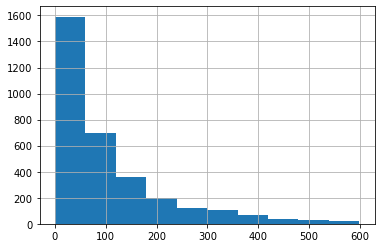

In [734]:
bayes_stat = bayes_adj.copy()

#bayes_stat['ROI'] = (bayes_stat['Revenue'].astype(float) / bayes_stat['Budget'].astype(float)) * 100
data_ROI= bayes_stat['ROI']
data_ROI.hist()
%store bayes_adj

### D'Agostino and Pearson's Test

In [735]:
# D'Agostino and Pearson's Test on ROI

from scipy.stats import normaltest
# generate univariate observations
datax = data_ROI
# normality test
stat, p = normaltest(datax)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1081.942, p=0.000
Sample does not look Gaussian (reject H0)


### Pearson's Correlation test

In [737]:
# Pearson's Correlation test
from scipy.stats import pearsonr
data1 = bayes_stat['Critics_Choice']
data2 = bayes_stat['Profit']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.115, p=0.000
Probably dependent


In [738]:
# Pearson's Correlation test
from scipy.stats import pearsonr
data1 = bayes_stat['Users_Pick']
data2 = bayes_stat['Profit']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.137, p=0.000
Probably dependent


### Shapiro-Wilk Test to determine if stats are Gaussian

In [739]:
# Shapiro-Wilk Test to determine if 'Score' distribution is Gaussian



# generate univariate observations
data_s = bayes_stat['Critics_Choice']
# normality test
stat, p = shapiro(data_s)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.542, p=0.000
Sample does not look Gaussian (reject H0)


In [741]:
# Shapiro-Wilk Test to determine if stats are Gaussian




# generate univariate observations
data = bayes_stat['Profit']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.807, p=0.000
Sample does not look Gaussian (reject H0)


--------------------- 
FIN

---------------